In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import glob

from fastai import *
from fastai.vision import *
import pandas as pd

import tarfile
import scipy.io
import numpy as np
import cv2
import os
import shutil
import random

from torchvision.models import *
from fastai.vision.models import *
from fastai.vision.learner import model_meta

import sys
import pretrainedmodels

In [2]:
path = Path('/home/amccarthy13/Documents/car-damage-dataset')


In [3]:
tfms = get_transforms(do_flip=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.2,
                      xtra_tfms=[brightness(change=(0.5*(1-0.1), 0.5*(1+0.1)), p=0.75),
                                 contrast(scale=(1-0.1, 1/(1-0.1)), p=0.75)])

data1 = ImageDataBunch.from_folder(path/'data2a','training','validation',ds_tfms=tfms, bs=64, size=624).normalize(imagenet_stats)

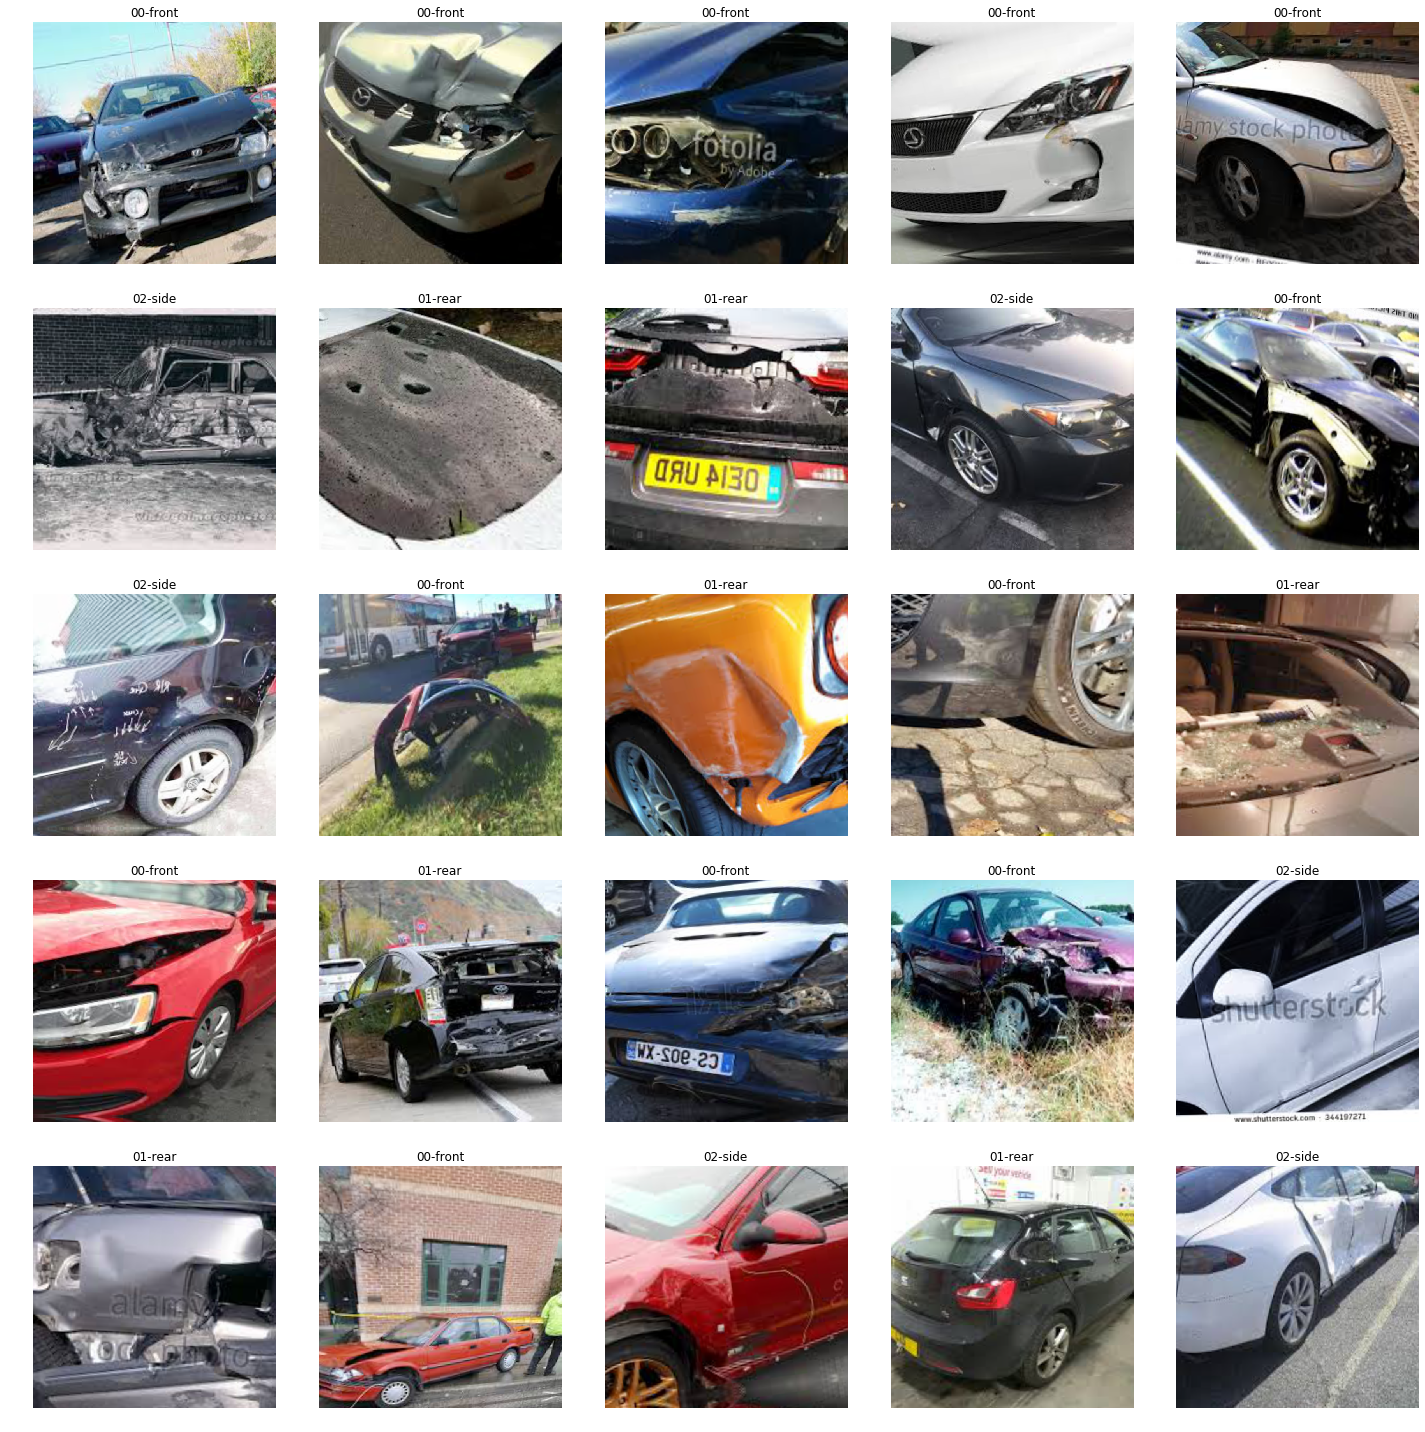

In [4]:
data1.show_batch()

In [6]:
print(len(data1.classes))
print(data1.classes)

3
['00-front', '01-rear', '02-side']


In [7]:
learn1 = create_cnn(data1, models.resnet34, pretrained=True, metrics=[error_rate, accuracy])
learn1.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


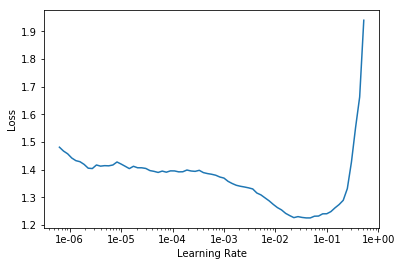

In [8]:
learn1.lr_find()
learn1.recorder.plot()

In [9]:
lr = 4.5e-3
learn1.fit_one_cycle(15, slice(lr))

epoch,train_loss,valid_loss,error_rate,accuracy,time
1,1.295206,1.100537,0.602339,0.397661,00:17
2,1.207492,0.879043,0.385965,0.614035,00:17
3,1.099170,0.891436,0.374269,0.625731,00:16
4,1.026941,0.938823,0.432749,0.567251,00:16
5,0.969962,0.916488,0.403509,0.596491,00:17
6,0.911067,0.839245,0.374269,0.625731,00:17
7,0.849006,0.842888,0.391813,0.608187,00:16
8,0.801587,0.807872,0.350877,0.649123,00:17
9,0.757859,0.821267,0.380117,0.619883,00:16
10,0.704388,0.846424,0.374269,0.625731,00:17


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


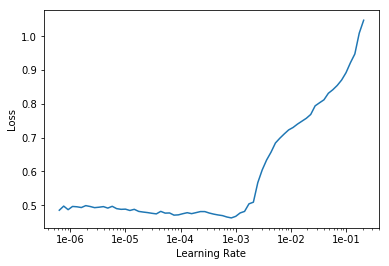

In [10]:
learn1.unfreeze()
learn1.lr_find()
learn1.recorder.plot()

In [11]:
learn1.fit_one_cycle(15, slice(1e-4, 1e-3))

3.7.1 (default, Dec 14 2018, 19:28:38) 
[GCC 7.3.0]


epoch,train_loss,valid_loss,error_rate,accuracy,time
1,0.533978,0.786331,0.333333,0.666667,00:21
2,0.480939,0.742492,0.286550,0.713450,00:21
3,0.430524,1.079269,0.415205,0.584795,00:20
4,0.402810,1.005587,0.339181,0.660819,00:21
5,0.395214,1.182960,0.345029,0.654971,00:20
6,0.372907,1.304555,0.315789,0.684211,00:21
7,0.328452,0.826946,0.251462,0.748538,00:21
8,0.279918,0.873205,0.233918,0.766082,00:21
9,0.228939,0.841161,0.286550,0.713450,00:21
10,0.189833,0.763744,0.228070,0.771930,00:21


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


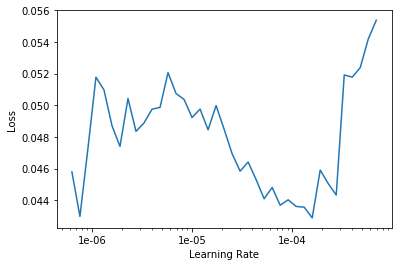

In [12]:
learn1.unfreeze()
learn1.lr_find()
learn1.recorder.plot()

In [13]:
learn1.fit_one_cycle(8, slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
1,0.048897,0.726253,0.228070,0.771930,00:21
2,0.038638,0.739057,0.216374,0.783626,00:20
3,0.036317,0.727661,0.204678,0.795322,00:20
4,0.035228,0.752567,0.222222,0.777778,00:21
5,0.031696,0.817613,0.233918,0.766082,00:21
6,0.031276,0.803129,0.222222,0.777778,00:21
7,0.030275,0.796009,0.210526,0.789474,00:21
8,0.028415,0.797957,0.210526,0.789474,00:21


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


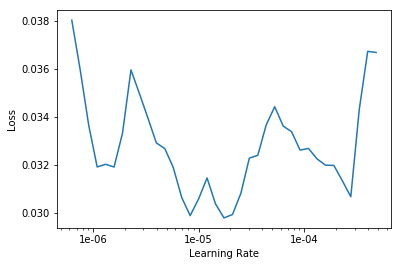

In [14]:
learn1.unfreeze()
learn1.lr_find()
learn1.recorder.plot()

In [15]:
learn1.fit_one_cycle(8, slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,error_rate,accuracy,time
1,0.026471,0.806189,0.210526,0.789474,00:20
2,0.026955,0.808983,0.210526,0.789474,00:20
3,0.028081,0.797639,0.198830,0.801170,00:21
4,0.026073,0.795760,0.210526,0.789474,00:20
5,0.026889,0.782107,0.198830,0.801170,00:20
6,0.025794,0.783635,0.198830,0.801170,00:20
7,0.027808,0.789140,0.198830,0.801170,00:21
8,0.026070,0.786608,0.198830,0.801170,00:20


In [16]:
log_preds, y = learn1.TTA()
prob = np.exp(log_preds)
accuracy(log_preds, y)

tensor(0.7719)

In [17]:
preds,y,losses = learn1.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn1, preds, y, losses)

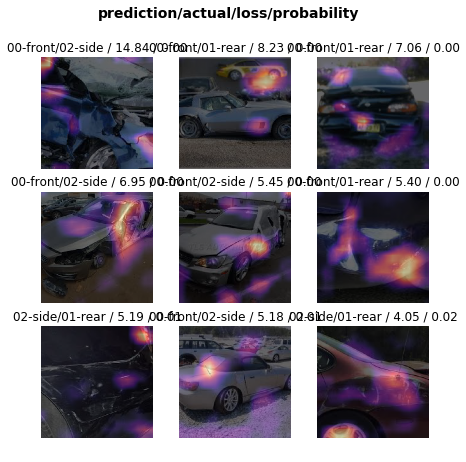

In [18]:
interp.plot_top_losses(9, figsize=(7,7))

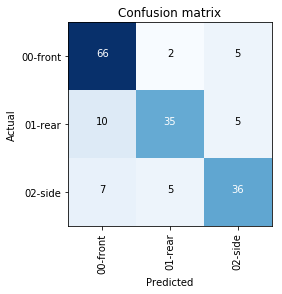

In [21]:
interp.plot_confusion_matrix()

In [24]:
data2 = ImageDataBunch.from_folder(path/'data2a','training','validation',ds_tfms=tfms, bs=64, size=400).normalize(imagenet_stats)
learn2 = create_cnn(data2, models.resnet50, pretrained=True, metrics=[error_rate, accuracy]).mixup()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


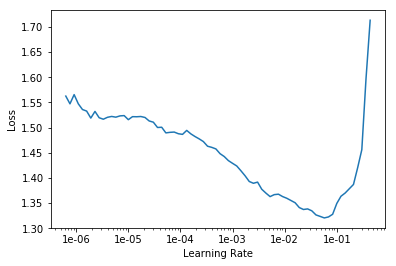

In [25]:
learn2.lr_find()
learn2.recorder.plot()

In [26]:
lr = 5e-3
learn2.fit_one_cycle(8, slice(lr))

epoch,train_loss,valid_loss,error_rate,accuracy,time
1,1.313495,0.884418,0.438596,0.561404,00:14
2,1.266237,0.868077,0.362573,0.637427,00:12
3,1.147634,0.809536,0.339181,0.660819,00:12
4,1.041900,0.792648,0.315789,0.684211,00:12
5,0.977048,0.730278,0.298246,0.701754,00:12
6,0.925211,0.724284,0.280702,0.719298,00:12
7,0.880651,0.731455,0.274854,0.725146,00:12
8,0.846824,0.729936,0.280702,0.719298,00:12


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


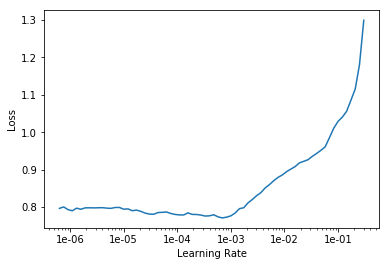

In [28]:
learn2.unfreeze()
learn2.lr_find()
learn2.recorder.plot()

In [32]:
learn2.fit_one_cycle(8, slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,error_rate,accuracy,time
1,0.706373,0.646548,0.274854,0.725146,00:15
2,0.693502,0.780090,0.339181,0.660819,00:15
3,0.691193,1.229912,0.391813,0.608187,00:15
4,0.682821,0.811949,0.368421,0.631579,00:15
5,0.656084,0.654656,0.274854,0.725146,00:15
6,0.630184,0.577559,0.216374,0.783626,00:15
7,0.612080,0.583594,0.216374,0.783626,00:15
8,0.600323,0.569624,0.216374,0.783626,00:15


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


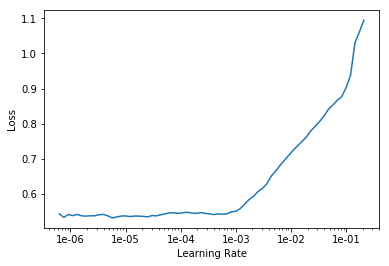

In [33]:
learn2.unfreeze()
learn2.lr_find()
learn2.recorder.plot()

In [34]:
learn2.fit_one_cycle(8, slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
1,0.521577,0.558878,0.210526,0.789474,00:15
2,0.529200,0.555992,0.198830,0.801170,00:15
3,0.544886,0.567202,0.216374,0.783626,00:15
4,0.538524,0.561834,0.210526,0.789474,00:15
5,0.528619,0.541711,0.198830,0.801170,00:15
6,0.522449,0.545696,0.198830,0.801170,00:15
7,0.517422,0.547279,0.216374,0.783626,00:15
8,0.516537,0.547102,0.210526,0.789474,00:15


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


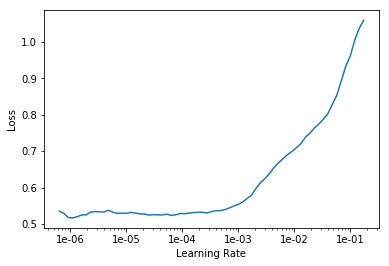

In [35]:
learn2.unfreeze()
learn2.lr_find()
learn2.recorder.plot()

In [36]:
learn2.fit_one_cycle(8, slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,error_rate,accuracy,time
1,0.526608,0.549070,0.210526,0.789474,00:14
2,0.514117,0.545438,0.216374,0.783626,00:15
3,0.500653,0.541969,0.198830,0.801170,00:15
4,0.508407,0.543425,0.204678,0.795322,00:15
5,0.502927,0.542378,0.198830,0.801170,00:15
6,0.501018,0.545569,0.198830,0.801170,00:15
7,0.507243,0.540963,0.198830,0.801170,00:15
8,0.516542,0.538803,0.198830,0.801170,00:15
